Confusion Matrix:
[[57  0]
 [ 0 43]]
Validation results for NUM_SAMPLE=1000000 saved/updated in output/result.csv.


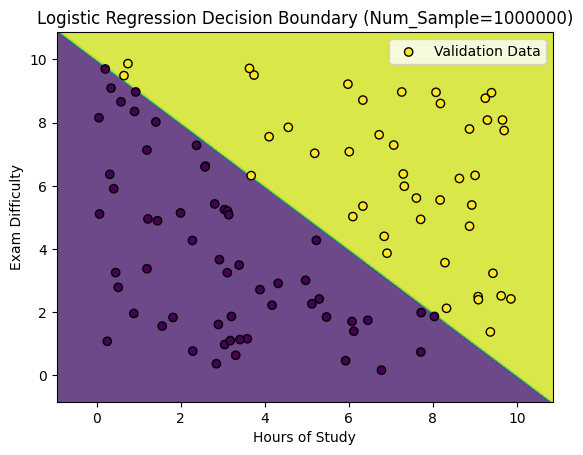

<Figure size 640x480 with 0 Axes>

In [9]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Constants
NUM_SAMPLE = 1000000  # Update this based on the model
VALIDATION_SAMPLE = 100  # Validation dataset size (fixed at 100)
output_dir = "output"
model_dir = "saved_models"
csv_path = os.path.join(output_dir, "result.csv")

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the saved Logistic Regression model
model_path = os.path.join(model_dir, f'logistic_regression_model_{NUM_SAMPLE}.pkl')

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found: {model_path}")

with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Generate validation dataset (fixed at 100 samples)
# Changing Feature 1 and Feature 2 to meaningful names like "Hours of Study" and "Exam Difficulty"
np.random.seed(42)
X_val = np.random.rand(VALIDATION_SAMPLE, 2) * 10  # Hours of Study and Exam Difficulty
y_val = (X_val[:, 0] + X_val[:, 1] > 10).astype(int)  # Binary labels (1 if sum > 10, else 0)

# Predict using the loaded model
y_pred = loaded_model.predict(X_val)

# Calculate performance metrics

# Accuracy: Overall correctness of the model (TP + TN) / (Total)
# - Should be high, closer to 1.
# - If accuracy is low, it might be due to class imbalance or the model not learning the features well.
accuracy = accuracy_score(y_val, y_pred)

# F1 Score: Harmonic mean of precision and recall.
# - Should be high, closer to 1.
# - A low F1 score suggests that either precision or recall is low.
f1 = f1_score(y_val, y_pred)

# Precision: The ratio of correctly predicted positive observations to the total predicted positives.
# - Should be high, closer to 1.
# - Low precision means the model predicts many false positives (wrongly classifying negatives as positives).
precision = precision_score(y_val, y_pred)

# Recall: The ratio of correctly predicted positive observations to the all observations in the actual class.
# - Should be high, closer to 1.
# - Low recall means the model misses many positives (wrongly classifying positives as negatives).
recall = recall_score(y_val, y_pred)

# Confusion Matrix: Breakdown of actual vs predicted classifications
conf_matrix = confusion_matrix(y_val, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Prepare the DataFrame to store/update results in result.csv
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
else:
    df = pd.DataFrame(columns=[
        "Num_Sample", "Accuracy", "F1 Score", "Precision", "Recall"
    ])

# Check if the Num_Sample already exists in the CSV
if NUM_SAMPLE in df["Num_Sample"].values:
    # Update the existing row
    df.loc[df["Num_Sample"] == NUM_SAMPLE, [
        "Accuracy", "F1 Score", "Precision", "Recall"
    ]] = [accuracy, f1, precision, recall]
else:
    # Add a new row
    new_row = {
        "Num_Sample": NUM_SAMPLE,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Precision": precision,
        "Recall": recall
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print(f"Validation results for NUM_SAMPLE={NUM_SAMPLE} saved/updated in {csv_path}.")

# --- Visualize the decision boundary and validation points ---

# Define the decision boundary grid
x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the classes for each point in the grid
Z = loaded_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the validation points
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, edgecolors='k', marker='o', label="Validation Data")

# Labels and title
plt.xlabel("Hours of Study")
plt.ylabel("Exam Difficulty")
plt.title(f"Logistic Regression Decision Boundary (Num_Sample={NUM_SAMPLE})")
plt.legend()

# Show the plot
plt.show()
plt.savefig(os.path.join(output_dir, f'{NUM_SAMPLE}.png'))